In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

data = pd.read_csv("/home/ajaykumar/ML/Decision Tree/Heart_Disease .csv")
data

datadtypes = data.dtypes
print(datadtypes)


age          int64
sex          int64
cp           int64
restbp       int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca          object
thal        object
hd           int64
dtype: object


In [8]:
####Missing values
data.replace('?',np.nan,inplace=True)
data.isnull().any()

data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)
# data = data.dropna()
# data

data = data.fillna(data.mean())
data
# # data['ca'] = data['ca'].fillna(data['ca'].mean())
# # data['thal'] = data['thal'].fillna(data['thal'].mean())
# X = data.iloc[:,0:13]
# Y = data.iloc[:,13]
data = pd.get_dummies(X,columns=['ca','thal','restecg','slope'])

age          int64
sex          int64
cp           int64
restbp       int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca         float64
thal       float64
hd           int64
dtype: object


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [51]:
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
rfc = RandomForestClassifier(criterion='gini',random_state=42)

rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [52]:
###Feature importance 
print("Feature importance array is :",rfc.feature_importances_)

Feature importance array is : [0.09495746 0.03245952 0.10365331 0.08975618 0.09772371 0.01348845
 0.01673694 0.12859532 0.05220994 0.10365898 0.03397059 0.12831081
 0.10447881]


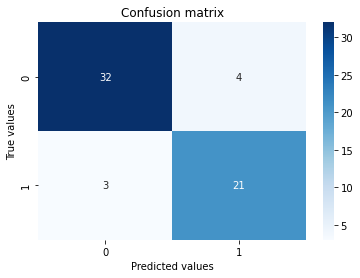

In [53]:
import seaborn as snb

conf_matrix = confusion_matrix(Y_test,y_pred)
snb.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix')
plt.show()

The cv_scores for 10 folds is :  [0.79166667 0.83333333 0.83333333 0.91666667 0.70833333 0.91666667
 0.66666667 0.73913043 0.86956522 0.7826087 ]


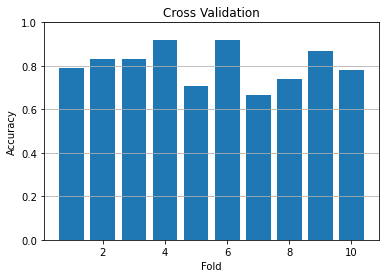

In [54]:
####Cross validation
cv_scores = cross_val_score(rfc,X_train,Y_train,cv=10)
print("The cv_scores for 10 folds is : ",cv_scores)

plt.bar(np.arange(1,len(cv_scores)+1),cv_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

In [55]:
##accuracy score
print("The accuracy is : ",accuracy_score(Y_test,y_pred))

report = classification_report(Y_test,y_pred)
print(report)

The accuracy is :  0.8833333333333333
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [65]:
from sklearn.model_selection import RandomizedSearchCV

###Optimal Features
n_estimators = [10,20,30,50,100]
max_depth = [2,3,5,7,8]
max_features = ['sqrt','log2']

sample_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'max_features' : max_features
}

random_search = RandomizedSearchCV(rfc,sample_grid,cv=10)

random_search.fit(X_train,Y_train)

print("Optimal values are : ",random_search.best_params_)

Optimal values are :  {'n_estimators': 20, 'max_features': 'sqrt', 'max_depth': 7}


In [66]:
###Finding the best model
best_model = random_search.best_estimator_
y_pred2 = best_model.predict(X_test)
y_pred2

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

The accuracy is :  0.9
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



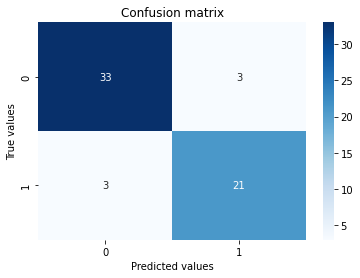

In [67]:
##accuracy score
print("The accuracy is : ",accuracy_score(Y_test,y_pred2))

report = classification_report(Y_test,y_pred2)
print(report)


conf_matrix = confusion_matrix(Y_test,y_pred2)
snb.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix')
plt.show()